# Parallelcoordtrans
Use of transparency with ||-Coord.

It displays the same data set twice. The first time without transparency and
the second time with transparency. On the second plot, several clusters
appear.

### Images without and with transparency


### Transparency works in PDF files





**Author:** Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:55 AM.</small></i>

In [1]:
%%cpp -d
#include "TFile.h"
#include "TCanvas.h"
#include "TStyle.h"
#include "TRandom.h"
#include "TNtuple.h"
#include "TParallelCoord.h"
#include "TParallelCoordVar.h"
#include "TParallelCoordRange.h"

Double_t r1,r2,r3,r4,r5,r6,r7,r8,r9;
Double_t dr = 3.5;
TRandom *r;

 A helper function is created: 

In [2]:
%%cpp -d
void generate_random(Int_t i) {
   r->Rannor(r1,r4);
   r->Rannor(r7,r9);
   r2 = (2*dr*r->Rndm(i))-dr;
   r3 = (2*dr*r->Rndm(i))-dr;
   r5 = (2*dr*r->Rndm(i))-dr;
   r6 = (2*dr*r->Rndm(i))-dr;
   r8 = (2*dr*r->Rndm(i))-dr;
}

In [3]:
Double_t x,y,z,u,v,w,a,b,c;
Double_t s1x, s1y, s1z;
Double_t s2x, s2y, s2z;
Double_t s3x, s3y, s3z;
r = new TRandom();;

TCanvas *c1 = new TCanvas("c1", "c1",0,0,900,1000);
c1->Divide(1,2);

TNtuple *nt = new TNtuple("nt","Demo ntuple","x:y:z:u:v:w:a:b:c");

int n=0;
for (Int_t i=0; i<1500; i++) {
   r->Sphere(s1x, s1y, s1z, 0.1);
   r->Sphere(s2x, s2y, s2z, 0.2);
   r->Sphere(s3x, s3y, s3z, 0.05);

   generate_random(i);
   nt->Fill(r1, r2, r3, r4, r5, r6, r7, r8, r9);
   n++;

   generate_random(i);
   nt->Fill(s1x, s1y, s1z, s2x, s2y, s2z, r7, r8, r9);
   n++;

   generate_random(i);
   nt->Fill(r1, r2, r3, r4, r5, r6, r7, s3y, r9);
   n++;

   generate_random(i);
   nt->Fill(s2x-1, s2y-1, s2z, s1x+.5, s1y+.5, s1z+.5, r7, r8, r9);
   n++;

   generate_random(i);
   nt->Fill(r1, r2, r3, r4, r5, r6, r7, r8, r9);
   n++;

   generate_random(i);
   nt->Fill(s1x+1, s1y+1, s1z+1, s3x-2, s3y-2, s3z-2, r7, r8, r9);
   n++;

   generate_random(i);
   nt->Fill(r1, r2, r3, r4, r5, r6, s3x, r8, s3z );
   n++;
}

TParallelCoordVar* pcv;

c1->cd(1);

||-coord plot without transparency

In [4]:
nt->Draw("x:y:z:u:v:w:a:b:c","","para");
TParallelCoord* para1 = (TParallelCoord*)gPad->GetListOfPrimitives()->FindObject("ParaCoord");
para1->SetLineColor(25);
pcv = (TParallelCoordVar*)para1->GetVarList()->FindObject("x"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para1->GetVarList()->FindObject("y"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para1->GetVarList()->FindObject("z"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para1->GetVarList()->FindObject("a"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para1->GetVarList()->FindObject("b"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para1->GetVarList()->FindObject("c"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para1->GetVarList()->FindObject("u"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para1->GetVarList()->FindObject("v"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para1->GetVarList()->FindObject("w"); pcv->SetHistogramHeight(0.);

||-coord plot with transparency

In [5]:
TColor *col26 = gROOT->GetColor(26); col26->SetAlpha(0.01);
c1->cd(2);
nt->Draw("x:y:z:u:v:w:a:b:c","","para");
TParallelCoord* para2 = (TParallelCoord*)gPad->GetListOfPrimitives()->FindObject("ParaCoord");
para2->SetLineColor(26);
pcv = (TParallelCoordVar*)para2->GetVarList()->FindObject("x"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para2->GetVarList()->FindObject("y"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para2->GetVarList()->FindObject("z"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para2->GetVarList()->FindObject("a"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para2->GetVarList()->FindObject("b"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para2->GetVarList()->FindObject("c"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para2->GetVarList()->FindObject("u"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para2->GetVarList()->FindObject("v"); pcv->SetHistogramHeight(0.);
pcv = (TParallelCoordVar*)para2->GetVarList()->FindObject("w"); pcv->SetHistogramHeight(0.);

Produce transparent lines in interactive and batch mode

In [6]:
c1->Print("parallelcoordtrans.pdf");
c1->Print("parallelcoordtrans.svg");

Info in <TCanvas::Print>: pdf file parallelcoordtrans.pdf has been created
Info in <TCanvas::Print>: SVG file parallelcoordtrans.svg has been created


Produce transparent lines in batch mode only

In [7]:
c1->Print("parallelcoordtrans.gif");
c1->Print("parallelcoordtrans.jpg");
c1->Print("parallelcoordtrans.png");

Info in <TCanvas::Print>: gif file parallelcoordtrans.gif has been created
Info in <TCanvas::Print>: jpg file parallelcoordtrans.jpg has been created
Info in <TCanvas::Print>: png file parallelcoordtrans.png has been created


Draw all canvases 

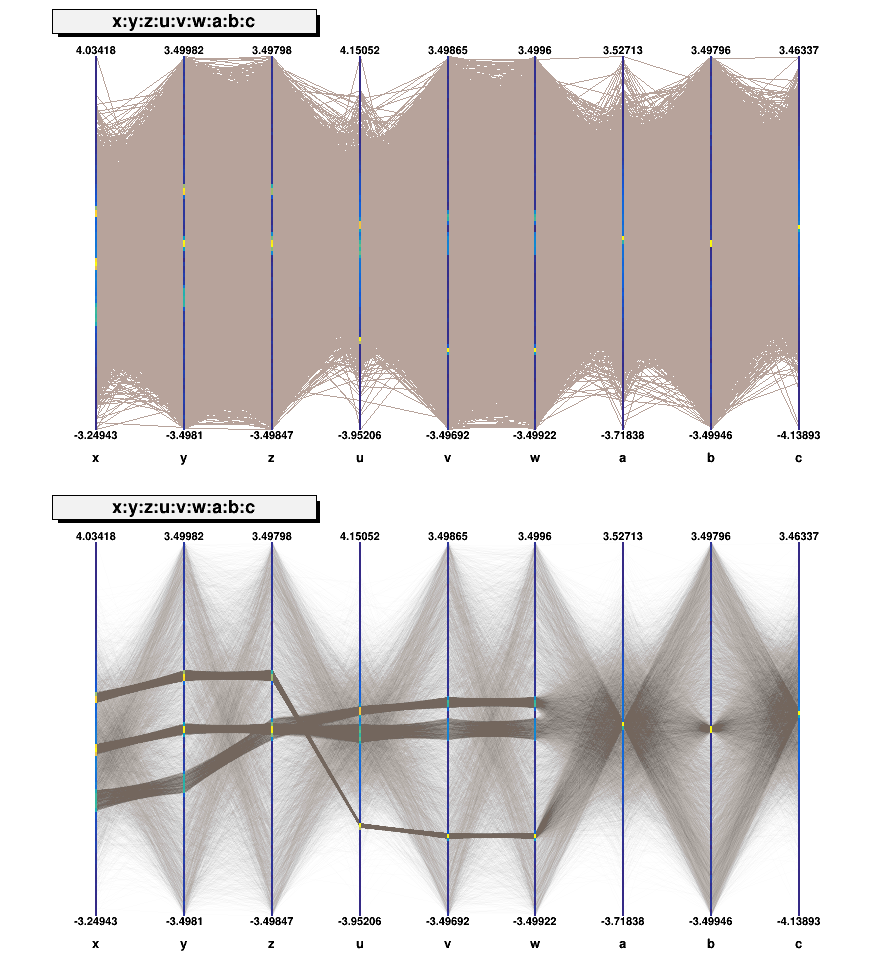

In [8]:
gROOT->GetListOfCanvases()->Draw()